# CoM M3 WT 20220420

Center of Mass Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Import Data

kinematicData = pd.read_csv('CoM-M3-WT-20220420-3-kinematics.csv')

# for i in kinematicData:
#     entry = kinematicData[0:i]
# Data Preview
kinematicData.head()

kinData = np.array(kinematicData)

selectedRange = 363

# Making sure I'm not eyeballing indices
index = kinematicData.columns.get_loc('36 CoMx (cm)')
print("CoMx", index)
index = kinematicData.columns.get_loc('15 Hipx (cm)')
print("Hipx", index)
index = kinematicData.columns.get_loc('16 Hipy (cm)')
print("Hipy", index)
index = kinematicData.columns.get_loc('29 HRx (cm)')
print("HRx", index)
index = kinematicData.columns.get_loc('30 HRy (cm)')
print("HRy", index)
index = kinematicData.columns.get_loc('24 toey (cm)')
print("toey", index)

# Assign time along X axis
time = kinData[0:selectedRange,0]
treadmillSpeed = kinData[0:selectedRange,2]
CoM = kinData[0:selectedRange,26]
hipY = kinData[0:selectedRange,7]
hipX= kinData[0:selectedRange,6]
hindlimbRightX = kinData[0:selectedRange, 20]
hindlimbRightY = kinData[0:selectedRange, 21]

print(CoM[:10])


CoMx 26
Hipx 6
Hipy 7
HRx 20
HRy 21
toey 15
[16.159607 16.187654 16.220922 16.221231 16.255438 16.230316 16.201113
 16.166183 16.099791 16.01943 ]


In [6]:
# Adjustment of the height of the Right Hindlimb and Calculation of xCoM
floorCorrection = 7.7733
hryAdjusted = hindlimbRightY - floorCorrection

# Verification of successful transfer
print(hindlimbRightY[:10])
print(hryAdjusted[:10])

# Calculation of xCoM
xCoMOriginallyDone = CoM + ((treadmillSpeed * CoM) / np.sqrt(9.81/ hindlimbRightY))
xCoM = CoM + ((treadmillSpeed * CoM) / np.sqrt(9.81 / hryAdjusted))

[3.482092 3.391969 3.374273 3.36673  3.369413 3.338934 3.346059 3.340225
 3.341053 3.346209]
[-4.291208 -4.381331 -4.399027 -4.40657  -4.403887 -4.434366 -4.427241
 -4.433075 -4.432247 -4.427091]


/tmp/ipykernel_50763/1117398073.py:11: RuntimeWarning: invalid value encountered in sqrt
  xCoM = CoM + ((treadmillSpeed * CoM) / np.sqrt(9.81 / hryAdjusted))


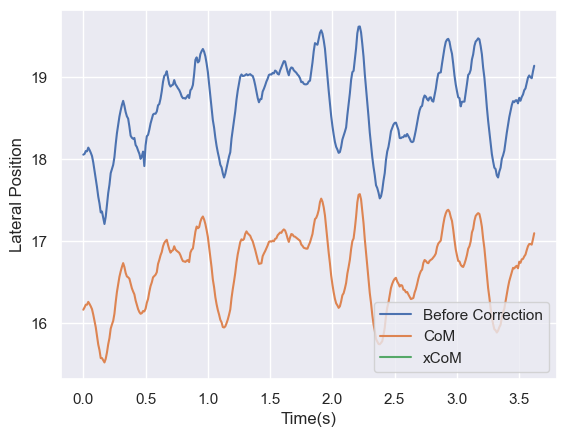

In [7]:
# Checking stuff


# for i in kinematicData:
#     entry = kinData[:,i]
# Plotting
sns.set()
plt.plot(time, xCoMOriginallyDone, label='Before Correction')
plt.plot(time, CoM, label='CoM')
plt.plot(time, xCoM, label='xCoM')
# plt.plot(time, hipX, label="Right Hip X")
# plt.plot(time, hipY)
# plt.plot(time, hindlimbRightY, label="Hindlimb Y")
plt.ylabel("Lateral Position")
plt.xlabel("Time(s)")
plt.legend(loc='lower right')
#     print("Index for:" + entry + i)

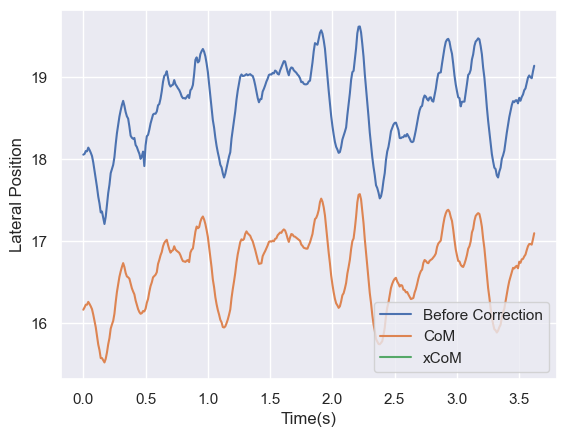

In [4]:
# Plotting
sns.set()
plt.plot(time, xCoMOriginallyDone, label='Before Correction')
plt.plot(time, CoM, label='CoM')
plt.plot(time, xCoM, label='xCoM')
# plt.plot(time, hipX, label="Right Hip X")
# plt.plot(time, hipY)
# plt.plot(time, hindlimbRightY, label="Hindlimb Y")
plt.ylabel("Lateral Position")
plt.xlabel("Time(s)")
plt.legend(loc='lower right')
# plt.plot(time, hindlimbRight)